## Prezzaggio di opzioni Europee Call e Put 

Vogliamo calcolare il prezzo di un'opzione europea (Call o Put) basandoci sulla teoria di Black e Scholes (1973) in cui l'andamento del prezzo dell'asset è modellizzato tramite un moto Browninano geometrico $GBM(\mu, \sigma)$. Il $GBM$ è un processo stocastico 
$$
S(t) = S(t') \exp \Big\{\big(\mu - \frac{1}{2}\sigma^2\big)(t - t') + \sigma W(0, t - t')\Big\}   \hspace{10 mm} \forall t > t' > 0 \hspace{5 mm}(1)
$$

soluzione dell'equazione differenziale stocastica (SDE)

$$
d ln S(t) = \Big( \mu - \frac{1}{2}\sigma^2 \Big)dt + \sigma dW(t) \hspace{25 mm} (2)
$$

in cui $W(0, t-t')$ è un processo di Wiener. Quindi il $GBM$ è il risultato dell'$\textit{"esponenziazione"}$ di un moto Browniano $BW(\mu, \sigma^2)$ in cui inoltre la volatilità $\sigma$ entra nel termine di drift $\mu$. 

Assegnati il valore iniziale dell'asset $S(0)$, il tempo finale $T$ e i parametri $\mu$ e $\sigma$ possiamo simulare il processo N volte e fare una statistica dei risultati. In particolare valutiamo i prezzi di due opzioni europee call o put con strike price $K$, dati da 

$$P_{call} = \exp^{-\mu T} \langle max\big[0, S(T) -K\big]\rangle$$ $$P_{put} = \exp^{-\mu T} \langle max\big[0, K - S(T)\big]\rangle .
$$

Black e Scholes hanno fornito una soluzione analitica a questo problema, in funzione dell'asset price $S(t)$ a ogni tempo $t < T$. Noi vogliamo invece stimare i valori medi simulando il processo N volte e plottando il risultato su un grafico con la sua incertezza statistica, in funzione del  numero di blocchi della simulazione.

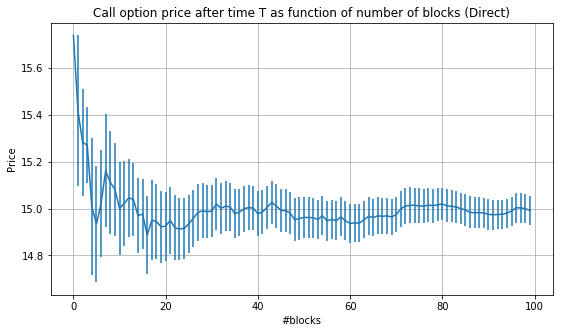

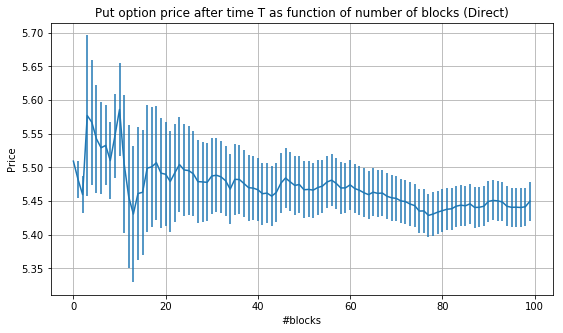

Il valore della call option è:  14.991406 +/- 0.06156666748699623
Il valore della put option è:  5.449819 +/- 0.02922967220777131


In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV1,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV1[n] - AV2[n])/n)
    
# Carico da file i prezzi della call e put option nel caso diretto 

call, c_ave, c_ave2 = np.loadtxt("Dir_Call.out", usecols=(0, 1, 2), unpack = 'true')
put, p_ave, p_ave2 = np.loadtxt("Dir_Put.out", usecols=(0, 1, 2), unpack = 'true')

N = len(call)
e_C = np.zeros(N)
e_P = np.zeros(N)
n = np.arange(N)

# Calcolo la deviazione standard dalla media tramite la funzione error 
for i in range(N):
    e_C[i] = error(c_ave, c_ave2, i)
    e_P[i] = error(p_ave, p_ave2, i)

# Plotto i risultati per la call option  
plt.figure(figsize=(9,5))
plt.errorbar(n, call, e_C)
plt.xlabel('#blocks')
plt.ylabel('Price')
plt.title('Call option price after time T as function of number of blocks (Direct)')
plt.grid(True)
plt.show()

# Plotto i risultati per la put option  
plt.figure(figsize=(9,5))
plt.errorbar(n, put, e_P)
plt.xlabel('#blocks')
plt.ylabel('Price')
plt.title('Put option price after time T as function of number of blocks (Direct)')
plt.grid(True)
plt.show()

# Stampo la miglior stima per i valori delle opzioni con l'incertezza statistica
print('Il valore della call option è: ', call[N - 1], '+/-', e_C[N-1] )
print('Il valore della put option è: ', put[N - 1], '+/-', e_P[N-1])

### Discretizzazione del processo

Vogliamo ora utilizzare un metodo più generale, che sarà applicabile anche in casi più sofisticati in cui la soluzione di una SDE non sarà nota analitcamente. Il metodo in questo contesto è già contenuto nella forma della $(1)$: infatti suddividendo l'intervallo temporale $(0, T)$ in $n$ sottointervalli $(t_{i-1}, t_{i})$ si può scrivere

$$
S(t_i) = S(t_{i-1}) \exp \Big\{\big(\mu - \frac{1}{2}\sigma^2\big)(t_i - t_{i-1}) + \sigma W(0, t_{i} - t_{i-1})\Big\}.    \hspace{25 mm}(3)
$$

Quindi il processo può anche essere simulato step by step, effettuando l'intero cammino N volte e giungendo infine all'asset price al tempo $T$. Nel nostro caso la $(3)$ ha ancora la forma della $(1)$, quindi il metodo di discretizzazione risultante da questa procedura è $\textit{esatto}$, nel senso che non introduce approssimazioni: i risultati trovati sostituendo $t = T$ e $t' = 0$ nella $(1)$ saranno uguali a quelli calcolati con la discretizzazione, dove l'uguaglianza varrà in senso statistico (ovviamente il risultato delle simulazioni sarà leggermente diverso, ma sempre statisticamente compatibile).

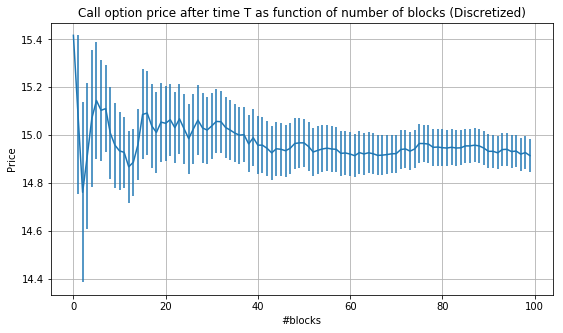

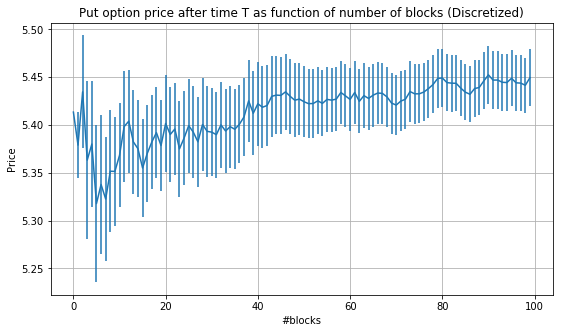

Il valore della call option è:  14.913817 +/- 0.06914514086362405
Il valore della put option è:  5.449555 +/- 0.029769484749021406


In [19]:
call, c_ave, c_ave2 = np.loadtxt("Disc_Call.out", usecols=(0, 1, 2), unpack = 'true')
put, p_ave, p_ave2 = np.loadtxt("Disc_Put.out", usecols=(0, 1, 2), unpack = 'true')

N = len(call)
e_C = np.zeros(N)
e_P = np.zeros(N)
n = np.arange(N)

for i in range(N):
    e_C[i] = error(c_ave, c_ave2, i)
    e_P[i] = error(p_ave, p_ave2, i)
    

plt.figure(figsize=(9,5))
plt.errorbar(n, call, e_C)
plt.xlabel('#blocks')
plt.ylabel('Price')
plt.title('Call option price after time T as function of number of blocks (Discretized)')
plt.grid(True)
plt.show()

plt.figure(figsize=(9,5))
plt.errorbar(n, put, e_P)
plt.xlabel('#blocks')
plt.ylabel('Price')
plt.title('Put option price after time T as function of number of blocks (Discretized)')
plt.grid(True)
plt.show()

print('Il valore della call option è: ', call[N - 1], '+/-', e_C[N-1])
print('Il valore della put option è: ', put[N - 1], '+/-', e_P[N-1])

### Confronto con il risultato di Black e Scholes

Con i valori dei parametri da noi utilizzati la soluzione di Black e Scholes prevede i seguenti valori per il valore delle opzioni (presi dal jupyter-notebook dell'esercizio):

$$
P_{call} = 14.975790778311286
$$
$$
P_{put} = 5.4595325819072364
$$

I valori calcolati sono quindi compatibili con il risultato teorico.